# 20163228 Yuseon Nam

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import math

In [2]:
# Make x and y domain matrix
def make_domain_matrix() :
    x_matrix = np.zeros((M, N), dtype="int")
    y_matrix = np.zeros((M, N), dtype="int")
    
    for i in range(M) :
        x_matrix[i, :] = i
    
    for j in range(N) :
        y_matrix[:, j] = j

    return (x_matrix, y_matrix)
    
# Distance function between two vectors x and y by L1 Norm
def distance_L1(x, y, c) :
    dx = abs(x - c[0])
    dy = abs(y - c[1])
    s = dx + dy
    
    return (s)

# Distance function between two vectors x and y by L2 Norm
def distance_L2(x, y, c):

    dx = (x - c[0]) ** 2
    dy = (y - c[1]) ** 2
    s = dx + dy
    
    return(s)

# Plot image
def plot_image(label, k) :
    
    plt.imshow(label, cmap=plt.cm.get_cmap('gist_ncar', k))
    plt.colorbar(ticks=range(k), format='color: %d')
    plt.axis('off')
    


In [3]:
class KMeans() :
    def __init__ (self, k) :
        self.k = k
        self.centroid_xy    = np.zeros((self.k, 2), dtype="float")
        self.centroid_count = np.zeros(self.k, dtype="int")
        
    def init_centroid(self) :
        for i in range(M) :
            for j in range(N) :
                rand_label = random.randint(0, self.k-1)
                self.cur_label[i][j] = rand_label
                
                
    def update_centroid(self) :
        self.centroid_xy    = np.zeros((self.k, 2), dtype="float")
        self.centroid_count = np.zeros(self.k, dtype="int")
        
        # Sum all x and y by label
        for i in range (M) :
            for j in range (N) :
                label = self.cur_label[i][j]
                self.centroid_xy[label, 0] += i
                self.centroid_xy[label, 1] += j
                self.centroid_count[label] += 1

                
        # Divide sum of centroid by count
        for i in range (self.k) :
            if (self.centroid_count[i] != 0) :
                self.centroid_xy[i , :] /= self.centroid_count[i]

    
    def labeling(self, norm) :
        # Label for each entry
        for i in range (M) :
            for j in range (N) :
                
                # Calculate distance between each centroid and entry
                dist_sum = []
                for t in range (self.k) :
                    if (norm == 1) :  
                        dist_sum.append(distance_L1(i, j, self.centroid_xy[t, :]))
                    elif (norm == 2) :
                        dist_sum.append(distance_L2(i, j, self.centroid_xy[t, :]))
                        
                # Find minimum distance and its index
                min_dist  = min(dist_sum)
                min_index = dist_sum.index(min_dist)
                
                # Put index in the label
                self.cur_label[i][j] = min_index
                
                
    def train(self, norm) :
        self.cur_label  = np.zeros((M, N), dtype="int")
        self.prev_label = np.zeros((M, N), dtype="int")
        
        self.init_centroid()
        
        while not (np.array_equal(self.cur_label, self.prev_label)) :
            
            self.update_centroid()
            
            self.prev_label = copy.deepcopy(self.cur_label)
            
            self.labeling(norm)
        
        return (self.cur_label)

In [4]:
# Number of rows(M) and columns(N)
M = 50
N = 50

# Make x and y domain matrix
x_matrix, y_matrix = make_domain_matrix()

## K = 3
### L1 Norm

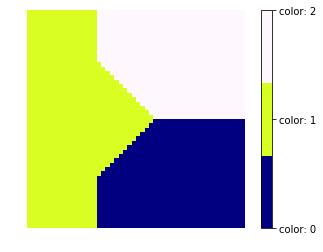

In [5]:
k_num = 3
k_means= KMeans(k_num)
k_num_label = k_means.train(1)

plot_image(k_num_label, k_num)

### L2 Norm

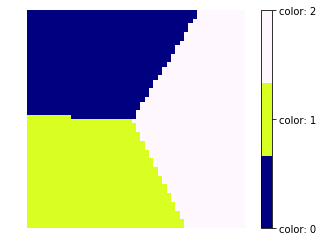

In [6]:
k_means= KMeans(k_num)
k_num_label = k_means.train(2)

plot_image(k_num_label, k_num)

## K = 8
### L1 Norm

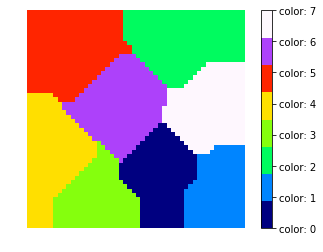

In [7]:
k_num = 8
k_means= KMeans(k_num)
k_num_label = k_means.train(1)

plot_image(k_num_label, k_num)

### L2 Norm

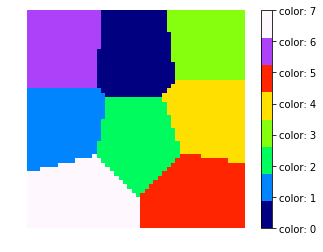

In [8]:
k_means= KMeans(k_num)
k_num_label = k_means.train(2)

plot_image(k_num_label, k_num)

## K = 16
### L1 Norm

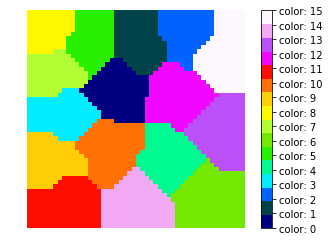

In [9]:
k_num = 16
k_means= KMeans(k_num)
k_num_label = k_means.train(1)

plot_image(k_num_label, k_num)

### L2 Norm

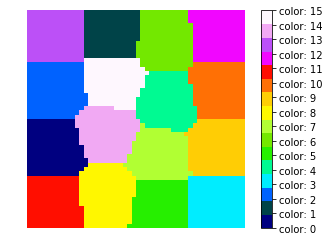

In [10]:
k_means= KMeans(k_num)
k_num_label = k_means.train(2)

plot_image(k_num_label, k_num)